# Geometric kriging
In this example, taken from the [PyKrige](https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/examples/04_krige_geometric.html) documentation, we use a dataset of observations with latitude and longitude coordinates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pykrige.kriging_tools as kt
from pykrige.ok import OrdinaryKriging

In [12]:
# Make this example reproducible:
np.random.seed(89239413)

## The observations dataset

In [13]:
# Generate random data following a uniform spatial distribution
# of nodes and a uniform distribution of values in the interval
# [2.0, 5.5]:
N = 7
lon = 360.0 * np.random.random(N)
lat = 180.0 / np.pi * np.arcsin(2 * np.random.random(N) - 1)
z = 3.5 * np.random.rand(N) + 2.0
z

array([2.74878016, 3.36196987, 2.23655655, 3.06696569, 3.36542928,
       5.24849692, 2.82391007])

## The grid

In [22]:
# Generate a regular grid with 60° longitude and 30° latitude steps:
grid_lon = np.linspace(0.0, 360.0, 7)
grid_lon

array([  0.,  60., 120., 180., 240., 300., 360.])

In [21]:
grid_lat = np.linspace(-90.0, 90.0, 7)
grid_lat

array([-90., -60., -30.,   0.,  30.,  60.,  90.])

## Computing the variogram and the kridged data
We use the 'geographic' coordinates type so that the distance between the data points and the nodes of the grid is computed taking into account that they are points over a sphere.

In [15]:
# Create ordinary kriging object:
OK = OrdinaryKriging(
    lon,
    lat,
    z,
    variogram_model="linear",
    verbose=False,
    enable_plotting=False,
    coordinates_type="geographic",
)

In [16]:
# Execute on grid:
z1, ss1 = OK.execute("grid", grid_lon, grid_lat)

We also compute the kriging using the default coordinates type, 'euclidean', to see the difference with the correct metric.

In [17]:
# Create ordinary kriging object ignoring curvature:
OK = OrdinaryKriging(
    lon, 
    lat, 
    z, 
    variogram_model="linear", 
    verbose=False, 
    enable_plotting=False
)


In [18]:
# Execute on grid:
z2, ss2 = OK.execute("grid", grid_lon, grid_lat)

In [19]:
print("Original data:")
print("Longitude:", lon.astype(int))
print("Latitude: ", lat.astype(int))
print("z:        ", np.array_str(z, precision=2))
print("\nKrige at 60° latitude:\n======================")
print("Longitude:", grid_lon)
print("Value:    ", np.array_str(z1[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss1[5, :], precision=2))
print("\nIgnoring curvature:\n=====================")
print("Value:    ", np.array_str(z2[5, :], precision=2))
print("Sigma²:   ", np.array_str(ss2[5, :], precision=2))

Original data:
Longitude: [122 166  92 138  86 122 136]
Latitude:  [-46 -36 -25 -73 -25  50 -29]
z:         [2.75 3.36 2.24 3.07 3.37 5.25 2.82]

Krige at 60° latitude:
Longitude: [  0.  60. 120. 180. 240. 300. 360.]
Value:     [5.29 5.11 5.27 5.17 5.35 5.63 5.29]
Sigma²:    [2.22 1.32 0.42 1.21 2.07 2.48 2.22]

Ignoring curvature:
Value:     [4.55 4.72 5.25 4.82 4.61 4.53 4.48]
Sigma²:    [3.79 2.   0.39 1.85 3.54 5.46 7.53]


## Kriging visualization
We plot the z function computed using the curvature and without. We can see in the latter case that the region with high values is erronously shifted westwards

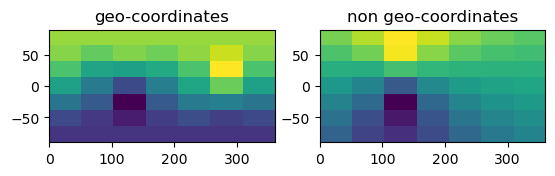

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(z1, extent=[0, 360, -90, 90], origin="lower")
ax1.set_title("geo-coordinates")
ax2.imshow(z2, extent=[0, 360, -90, 90], origin="lower")
ax2.set_title("non geo-coordinates")
plt.show()